In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train_data.csv').set_index('PassengerId')
test = pd.read_csv('test_data.csv').set_index('PassengerId')

In [4]:
statuses = []
for i in train['Name'].str.split(', '):
    statuses.append(i[1].split('.')[0])
    
train['Status'] = statuses

In [5]:
train['Is alone']= 0
train.loc[(train['SibSp'] == 0) & (train['Parch'] == 0), 'Is alone'] = 1
train = train.drop(['Ticket', 'Name', 'Cabin'], axis=1)
train.loc[:, 'Sex'] = train['Sex'].apply(lambda x: 0 if x == 'female' else 1)
# train = pd.get_dummies(train)
# train.loc[:, 'Fare'] = preprocessing.scale(train['Fare'])
train['Family size'] = train['SibSp'] + train['Parch']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Status,Is alone,Family size
PassengerId,,,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr,0,1
2,1,1,female,38.0,1,0,71.2833,C,Mrs,0,1
3,1,3,female,26.0,0,0,7.9250,S,Miss,1,0
4,1,1,female,35.0,1,0,53.1000,S,Mrs,0,1
5,0,3,male,35.0,0,0,8.0500,S,Mr,1,0


In [6]:
statuses = []
for i in test['Name'].str.split(', '):
    statuses.append(i[1].split('.')[0])
    
test['Status'] = statuses

In [7]:
test['Is alone']= 0
test.loc[(test['SibSp'] == 0) & (test['Parch'] == 0), 'Is alone'] = 1
test = test.drop(['Ticket', 'Name', 'Cabin'], axis=1)
test.loc[:, 'Sex'] = test['Sex'].apply(lambda x: 0 if x == 'female' else 1)
# test = pd.get_dummies(test)
# test.loc[:, 'Fare'] = preprocessing.scale(test['Fare'])
test['Family size'] = test['SibSp'] + test['Parch']
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Status,Is alone,Family size
PassengerId,,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,Mr,1,0
893,3,female,47.0,1,0,7.0000,S,Mrs,0,1
894,2,male,62.0,0,0,9.6875,Q,Mr,1,0
895,3,male,27.0,0,0,8.6625,S,Mr,1,0
896,3,female,22.0,1,1,12.2875,S,Mrs,0,2


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
Pclass         418 non-null int64
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
Status         418 non-null object
Is alone       418 non-null int64
Family size    418 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 31.0+ KB


In [9]:
mean_age = test.Age.mean()
std_age = test.Age.std()
test.loc[:, 'Age'] = test['Age'].fillna(np.random.uniform(mean_age - std_age, mean_age + std_age))
test = test.fillna(test.median())

In [10]:
mean_age = train.Age.mean()
std_age = train.Age.std()
train.loc[:, 'Age'] = train['Age'].fillna(np.random.uniform(mean_age - std_age, mean_age + std_age))

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
Status         891 non-null object
Is alone       891 non-null int64
Family size    891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 73.1+ KB


In [12]:
# pd.crosstab(np.log(train['Fare']), train['Survived']).plot()

# preprocessing.normalize(np.array(train['Fare'].values))

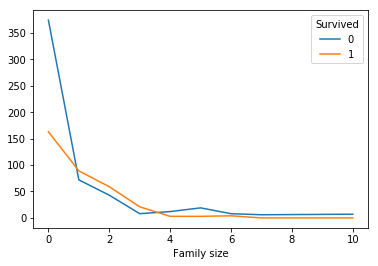

In [13]:
pd.crosstab(train['Family size'], train['Survived']).plot()

In [14]:
# pd.crosstab(np.log(train[train['Fare'] != 0]), train.loc[train['Fare'] != 0, 'Survived']).plot()

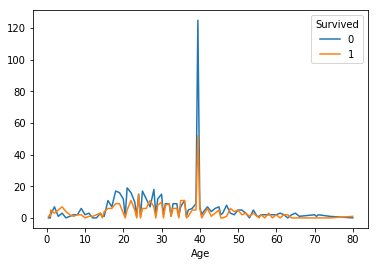

In [15]:
pd.crosstab(train['Age'], train['Survived']).plot()

In [16]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Is alone,Family size
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,31.645000,0.523008,0.381594,32.204208,0.602694,0.904602
std,0.486592,0.836071,13.577325,1.102743,0.806057,49.693429,0.489615,1.613459
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000
50%,0.000000,3.000000,32.000000,0.000000,0.000000,14.454200,1.000000,0.000000
75%,1.000000,3.000000,39.494493,1.000000,0.000000,31.000000,1.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000


In [17]:
# train.loc[train['Age'] <= 16, 'Sex'] = 2
# test.loc[test['Age'] <= 16, 'Sex'] = 2
# train.loc[train['Age'] >= 45, 'Sex'] = 3
# test.loc[test['Age'] >= 45, 'Sex'] = 3

In [18]:
# train = train.join(pd.get_dummies(train['Pclass'])).drop('Pclass', axis=1)
# test = test.join(pd.get_dummies(test['Pclass'])).drop('Pclass', axis=1)

In [19]:
train_label = train['Survived']
train_features = train.drop('Survived', axis=1)

In [30]:
train_features = train_features[['Pclass', 'Sex', 'Age']]

In [31]:
train_features.head()

,Pclass,Sex,Age
PassengerId,,,
1,3,male,22.0
2,1,female,38.0
3,3,female,26.0
4,1,female,35.0
5,3,male,35.0


In [33]:
test = test[['Pclass', 'Sex', 'Age']]
test.head()

,Pclass,Sex,Age
PassengerId,,,
892,3,male,34.5
893,3,female,47.0
894,2,male,62.0
895,3,male,27.0
896,3,female,22.0


In [21]:
depth = [x for x in range(1, 6)]

In [34]:
forest_classifier = RandomForestClassifier(random_state=0)

In [35]:
clf = GridSearchCV(estimator=forest_classifier, param_grid=dict(max_depth=depth),n_jobs=-1)

In [24]:
# Cs = np.logspace(-10, -1, 20)
# Cs

In [25]:
# linear_classifier = LogisticRegression()

In [26]:
# clf = GridSearchCV(estimator=linear_classifier, param_grid=dict(C=Cs),n_jobs=-1)

In [36]:
clf.fit(train_features, train_label)

JoblibValueError: JoblibValueError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
c:\program files (x86)\python36-32\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...6-32\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
c:\program files (x86)\python36-32\lib\runpy.py in _run_code(code=<code object <module> at 0x02EC9B78, file "c:\pr...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'c:\program files (x86)\python36-32\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...6-32\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'c:\\program ...32\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...6-32\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x02EC9B78, file "c:\pr...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'c:\program files (x86)\python36-32\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...6-32\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'c:\\program ...32\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    481         if self.poller is not None:
    482             self.poller.start()
    483         self.kernel.start()
    484         self.io_loop = ioloop.IOLoop.current()
    485         try:
--> 486             self.io_loop.start()
        self.io_loop.start = <bound method BaseAsyncIOLoop.start of <tornado.platform.asyncio.AsyncIOMainLoop object>>
    487         except KeyboardInterrupt:
    488             pass
    489 
    490 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\tornado\platform\asyncio.py in start(self=<tornado.platform.asyncio.AsyncIOMainLoop object>)
    107         except (RuntimeError, AssertionError):
    108             old_loop = None
    109         try:
    110             self._setup_logging()
    111             asyncio.set_event_loop(self.asyncio_loop)
--> 112             self.asyncio_loop.run_forever()
        self.asyncio_loop.run_forever = <bound method BaseEventLoop.run_forever of <_Win...EventLoop running=True closed=False debug=False>>
    113         finally:
    114             asyncio.set_event_loop(old_loop)
    115 
    116     def stop(self):

...........................................................................
c:\program files (x86)\python36-32\lib\asyncio\base_events.py in run_forever(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
    416             sys.set_asyncgen_hooks(firstiter=self._asyncgen_firstiter_hook,
    417                                    finalizer=self._asyncgen_finalizer_hook)
    418         try:
    419             events._set_running_loop(self)
    420             while True:
--> 421                 self._run_once()
        self._run_once = <bound method BaseEventLoop._run_once of <_Windo...EventLoop running=True closed=False debug=False>>
    422                 if self._stopping:
    423                     break
    424         finally:
    425             self._stopping = False

...........................................................................
c:\program files (x86)\python36-32\lib\asyncio\base_events.py in _run_once(self=<_WindowsSelectorEventLoop running=True closed=False debug=False>)
   1426                         logger.warning('Executing %s took %.3f seconds',
   1427                                        _format_handle(handle), dt)
   1428                 finally:
   1429                     self._current_handle = None
   1430             else:
-> 1431                 handle._run()
        handle._run = <bound method Handle._run of <Handle BaseAsyncIOLoop._handle_events(552, 1)>>
   1432         handle = None  # Needed to break cycles when an exception occurs.
   1433 
   1434     def _set_coroutine_wrapper(self, enabled):
   1435         try:

...........................................................................
c:\program files (x86)\python36-32\lib\asyncio\events.py in _run(self=<Handle BaseAsyncIOLoop._handle_events(552, 1)>)
    140             self._callback = None
    141             self._args = None
    142 
    143     def _run(self):
    144         try:
--> 145             self._callback(*self._args)
        self._callback = <bound method BaseAsyncIOLoop._handle_events of <tornado.platform.asyncio.AsyncIOMainLoop object>>
        self._args = (552, 1)
    146         except Exception as exc:
    147             cb = _format_callback_source(self._callback, self._args)
    148             msg = 'Exception in callback {}'.format(cb)
    149             context = {

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\tornado\platform\asyncio.py in _handle_events(self=<tornado.platform.asyncio.AsyncIOMainLoop object>, fd=552, events=1)
     97             self.writers.remove(fd)
     98         del self.handlers[fd]
     99 
    100     def _handle_events(self, fd, events):
    101         fileobj, handler_func = self.handlers[fd]
--> 102         handler_func(fileobj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fileobj = <zmq.sugar.socket.Socket object>
        events = 1
    103 
    104     def start(self):
    105         try:
    106             old_loop = asyncio.get_event_loop()

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    445             return
    446         zmq_events = self.socket.EVENTS
    447         try:
    448             # dispatch events:
    449             if zmq_events & zmq.POLLIN and self.receiving():
--> 450                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    451                 if not self.socket:
    452                     return
    453             if zmq_events & zmq.POLLOUT and self.sending():
    454                 self._handle_send()

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    475             else:
    476                 raise
    477         else:
    478             if self._recv_callback:
    479                 callback = self._recv_callback
--> 480                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    481         
    482 
    483     def _handle_send(self):
    484         """Handle a send event."""

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    427         close our socket."""
    428         try:
    429             # Use a NullContext to ensure that all StackContexts are run
    430             # inside our blanket exception handler rather than outside.
    431             with stack_context.NullContext():
--> 432                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    433         except:
    434             gen_log.error("Uncaught exception in ZMQStream callback",
    435                           exc_info=True)
    436             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    271         # Fast path when there are no active contexts.
    272         def null_wrapper(*args, **kwargs):
    273             try:
    274                 current_state = _state.contexts
    275                 _state.contexts = cap_contexts[0]
--> 276                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    277             finally:
    278                 _state.contexts = current_state
    279         null_wrapper._wrapped = True
    280         return null_wrapper

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf.fit(train_features, train_label)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 10, 20, 9, 38, 788604, tzinfo=tzutc()), 'msg_id': 'c521026d71f1c410f05ff849e50077ad', 'msg_type': 'execute_request', 'session': 'a8fc415518d048f811b44e3bfd9479c1', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c521026d71f1c410f05ff849e50077ad', 'msg_type': 'execute_request', 'parent_header': {}})
    228             self.log.warn("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'a8fc415518d048f811b44e3bfd9479c1']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf.fit(train_features, train_label)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 10, 20, 9, 38, 788604, tzinfo=tzutc()), 'msg_id': 'c521026d71f1c410f05ff849e50077ad', 'msg_type': 'execute_request', 'session': 'a8fc415518d048f811b44e3bfd9479c1', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c521026d71f1c410f05ff849e50077ad', 'msg_type': 'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'a8fc415518d048f811b44e3bfd9479c1'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': 'clf.fit(train_features, train_label)', 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2018, 7, 10, 20, 9, 38, 788604, tzinfo=tzutc()), 'msg_id': 'c521026d71f1c410f05ff849e50077ad', 'msg_type': 'execute_request', 'session': 'a8fc415518d048f811b44e3bfd9479c1', 'username': '', 'version': '5.2'}, 'metadata': {}, 'msg_id': 'c521026d71f1c410f05ff849e50077ad', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code='clf.fit(train_features, train_label)', silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = 'clf.fit(train_features, train_label)'
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=('clf.fit(train_features, train_label)',), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ('clf.fit(train_features, train_label)',)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='clf.fit(train_features, train_label)', store_history=True, silent=False, shell_futures=True)
   2657         -------
   2658         result : :class:`ExecutionResult`
   2659         """
   2660         try:
   2661             result = self._run_cell(
-> 2662                 raw_cell, store_history, silent, shell_futures)
        raw_cell = 'clf.fit(train_features, train_label)'
        store_history = True
        silent = False
        shell_futures = True
   2663         finally:
   2664             self.events.trigger('post_execute')
   2665             if not silent:
   2666                 self.events.trigger('post_run_cell', result)

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\IPython\core\interactiveshell.py in _run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell='clf.fit(train_features, train_label)', store_history=True, silent=False, shell_futures=True)
   2780                 self.displayhook.exec_result = result
   2781 
   2782                 # Execute the user code
   2783                 interactivity = 'none' if silent else self.ast_node_interactivity
   2784                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2785                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2786                 
   2787                 self.last_execution_succeeded = not has_raised
   2788                 self.last_execution_result = result
   2789 

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Expr object>], cell_name='<ipython-input-36-b16d75d15a5b>', interactivity='last', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 56b0630, execution_co...rue silent=False shell_futures=True> result=None>)
   2904                     return True
   2905 
   2906             for i, node in enumerate(to_run_interactive):
   2907                 mod = ast.Interactive([node])
   2908                 code = compiler(mod, cell_name, "single")
-> 2909                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x0CC0CD30, file "<ipython-input-36-b16d75d15a5b>", line 1>
        result = <ExecutionResult object at 56b0630, execution_co...rue silent=False shell_futures=True> result=None>
   2910                     return True
   2911 
   2912             # Flush softspace
   2913             if softspace(sys.stdout, 0):

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x0CC0CD30, file "<ipython-input-36-b16d75d15a5b>", line 1>, result=<ExecutionResult object at 56b0630, execution_co...rue silent=False shell_futures=True> result=None>)
   2958         outflag = True  # happens in more places, so it's easier as default
   2959         try:
   2960             try:
   2961                 self.hooks.pre_run_code_hook()
   2962                 #rprint('Running code', repr(code_obj)) # dbg
-> 2963                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x0CC0CD30, file "<ipython-input-36-b16d75d15a5b>", line 1>
        self.user_global_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nfrom skle...om sklearn.linear_model import LogisticRegression', "get_ipython().run_line_magic('matplotlib', 'inline')", "train = pd.read_csv('train_data.csv').set_index(...ead_csv('test_data.csv').set_index('PassengerId')", "statuses = []\nfor i in train['Name'].str.split('...1].split('.')[0])\n    \ntrain['Status'] = statuses", "train['Is alone']= 0\ntrain.loc[(train['SibSp'] =...'] = train['SibSp'] + train['Parch']\ntrain.head()", "statuses = []\nfor i in test['Name'].str.split(',...[1].split('.')[0])\n    \ntest['Status'] = statuses", "test['Is alone']= 0\ntest.loc[(test['SibSp'] == 0...ize'] = test['SibSp'] + test['Parch']\ntest.head()", 'test.info()', 'mean_age = test.Age.mean()\nstd_age = test.Age.st...age + std_age))\ntest = test.fillna(test.median())', 'mean_age = train.Age.mean()\nstd_age = train.Age.....uniform(mean_age - std_age, mean_age + std_age))', 'train.info()', "# pd.crosstab(np.log(train['Fare']), train['Surv...cessing.normalize(np.array(train['Fare'].values))", "pd.crosstab(train['Family size'], train['Survived']).plot()", "# pd.crosstab(np.log(train[train['Fare'] != 0]), train.loc[train['Fare'] != 0, 'Survived']).plot()", "pd.crosstab(train['Age'], train['Survived']).plot()", 'train.describe()', "# train.loc[train['Age'] <= 16, 'Sex'] = 2\n# tes...ex'] = 3\n# test.loc[test['Age'] >= 45, 'Sex'] = 3", "# train = train.join(pd.get_dummies(train['Pclas...t_dummies(test['Pclass'])).drop('Pclass', axis=1)", "train_label = train['Survived']\ntrain_features = train.drop('Survived', axis=1)", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5:              Survived  Pclass     Sex   Age  Sib...  1  
5               Mr         1            0  , 7:              Pclass     Sex   Age  SibSp  Parch ...         0  
896                 0            2  , 13: <matplotlib.axes._subplots.AxesSubplot object>, 15: <matplotlib.axes._subplots.AxesSubplot object>, 16:          Survived      Pclass         Age       ...0     1.000000  
max      1.000000    10.000000  , 20:              Pclass     Sex   Age  SibSp  Parch ...         1  
5                   1            0  , 28:              Pclass     Sex   Age  SibSp  Parch ...         0  
896                 0            2  , 31:              Pclass     Sex   Age
PassengerId   ...1  female  35.0
5                 3    male  35.0, 32:              Pclass     Sex   Age  SibSp  Parch ...         0  
896                 0            2  , 33:              Pclass     Sex   Age
PassengerId   ...3    male  27.0
896               3  female  22.0}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, '_':              Pclass     Sex   Age
PassengerId   ...3    male  27.0
896               3  female  22.0, '_13': <matplotlib.axes._subplots.AxesSubplot object>, '_15': <matplotlib.axes._subplots.AxesSubplot object>, ...}
        self.user_ns = {'DecisionTreeClassifier': <class 'sklearn.tree.tree.DecisionTreeClassifier'>, 'GridSearchCV': <class 'sklearn.model_selection._search.GridSearchCV'>, 'In': ['', 'import pandas as pd\nimport numpy as np\nfrom skle...om sklearn.linear_model import LogisticRegression', "get_ipython().run_line_magic('matplotlib', 'inline')", "train = pd.read_csv('train_data.csv').set_index(...ead_csv('test_data.csv').set_index('PassengerId')", "statuses = []\nfor i in train['Name'].str.split('...1].split('.')[0])\n    \ntrain['Status'] = statuses", "train['Is alone']= 0\ntrain.loc[(train['SibSp'] =...'] = train['SibSp'] + train['Parch']\ntrain.head()", "statuses = []\nfor i in test['Name'].str.split(',...[1].split('.')[0])\n    \ntest['Status'] = statuses", "test['Is alone']= 0\ntest.loc[(test['SibSp'] == 0...ize'] = test['SibSp'] + test['Parch']\ntest.head()", 'test.info()', 'mean_age = test.Age.mean()\nstd_age = test.Age.st...age + std_age))\ntest = test.fillna(test.median())', 'mean_age = train.Age.mean()\nstd_age = train.Age.....uniform(mean_age - std_age, mean_age + std_age))', 'train.info()', "# pd.crosstab(np.log(train['Fare']), train['Surv...cessing.normalize(np.array(train['Fare'].values))", "pd.crosstab(train['Family size'], train['Survived']).plot()", "# pd.crosstab(np.log(train[train['Fare'] != 0]), train.loc[train['Fare'] != 0, 'Survived']).plot()", "pd.crosstab(train['Age'], train['Survived']).plot()", 'train.describe()', "# train.loc[train['Age'] <= 16, 'Sex'] = 2\n# tes...ex'] = 3\n# test.loc[test['Age'] >= 45, 'Sex'] = 3", "# train = train.join(pd.get_dummies(train['Pclas...t_dummies(test['Pclass'])).drop('Pclass', axis=1)", "train_label = train['Survived']\ntrain_features = train.drop('Survived', axis=1)", ...], 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {5:              Survived  Pclass     Sex   Age  Sib...  1  
5               Mr         1            0  , 7:              Pclass     Sex   Age  SibSp  Parch ...         0  
896                 0            2  , 13: <matplotlib.axes._subplots.AxesSubplot object>, 15: <matplotlib.axes._subplots.AxesSubplot object>, 16:          Survived      Pclass         Age       ...0     1.000000  
max      1.000000    10.000000  , 20:              Pclass     Sex   Age  SibSp  Parch ...         1  
5                   1            0  , 28:              Pclass     Sex   Age  SibSp  Parch ...         0  
896                 0            2  , 31:              Pclass     Sex   Age
PassengerId   ...1  female  35.0
5                 3    male  35.0, 32:              Pclass     Sex   Age  SibSp  Parch ...         0  
896                 0            2  , 33:              Pclass     Sex   Age
PassengerId   ...3    male  27.0
896               3  female  22.0}, 'RandomForestClassifier': <class 'sklearn.ensemble.forest.RandomForestClassifier'>, 'SVC': <class 'sklearn.svm.classes.SVC'>, '_':              Pclass     Sex   Age
PassengerId   ...3    male  27.0
896               3  female  22.0, '_13': <matplotlib.axes._subplots.AxesSubplot object>, '_15': <matplotlib.axes._subplots.AxesSubplot object>, ...}
   2964             finally:
   2965                 # Reset our crash handler in place
   2966                 sys.excepthook = old_excepthook
   2967         except SystemExit as e:

...........................................................................
C:\Users\fairy_\Documents\mlearning\kaggle\titanic\<ipython-input-36-b16d75d15a5b> in <module>()
----> 1 clf.fit(train_features, train_label)

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\sklearn\model_selection\_search.py in fit(self=GridSearchCV(cv=None, error_score='raise',
     ...turn_train_score='warn', scoring=None, verbose=0), X=             Pclass     Sex        Age
Passenger...     3    male  32.000000

[891 rows x 3 columns], y=PassengerId
1      0
2      1
3      1
4      1
...91    0
Name: Survived, Length: 891, dtype: int64, groups=None, **fit_params={})
    634                                   return_train_score=self.return_train_score,
    635                                   return_n_test_samples=True,
    636                                   return_times=True, return_parameters=False,
    637                                   error_score=self.error_score)
    638           for parameters, (train, test) in product(candidate_params,
--> 639                                                    cv.split(X, y, groups)))
        cv.split = <bound method StratifiedKFold.split of Stratifie...ld(n_splits=3, random_state=None, shuffle=False)>
        X =              Pclass     Sex        Age
Passenger...     3    male  32.000000

[891 rows x 3 columns]
        y = PassengerId
1      0
2      1
3      1
4      1
...91    0
Name: Survived, Length: 891, dtype: int64
        groups = None
    640 
    641         # if one choose to see train score, "out" will contain train score info
    642         if self.return_train_score:
    643             (train_score_dicts, test_score_dicts, test_sample_counts, fit_time,

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object BaseSearchCV.fit.<locals>.<genexpr>>)
    784             if pre_dispatch == "all" or n_jobs == 1:
    785                 # The iterable was consumed all at once by the above for loop.
    786                 # No need to wait for async callbacks to trigger to
    787                 # consumption.
    788                 self._iterating = False
--> 789             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    790             # Make sure that we get a last message telling us we are done
    791             elapsed_time = time.time() - self._start_time
    792             self._print('Done %3i out of %3i | elapsed: %s finished',
    793                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
ValueError                                         Tue Jul 10 23:09:39 2018
PID: 11996      Python 3.6.4: c:\program files (x86)\python36-32\python.exe
...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False),              Pclass     Sex        Age
Passenger...     3    male  32.000000

[891 rows x 3 columns], PassengerId
1      0
2      1
3      1
4      1
...91    0
Name: Survived, Length: 891, dtype: int64, {'score': <function _passthrough_scorer>}, array([284, 285, 287, 292, 293, 294, 295, 296, 2...    882, 883, 884, 885, 886, 887, 888, 889, 890]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...90, 291, 298, 299, 300, 301, 303, 305, 306, 307]), 0, {'max_depth': 1}), {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False),              Pclass     Sex        Age
Passenger...     3    male  32.000000

[891 rows x 3 columns], PassengerId
1      0
2      1
3      1
4      1
...91    0
Name: Survived, Length: 891, dtype: int64, {'score': <function _passthrough_scorer>}, array([284, 285, 287, 292, 293, 294, 295, 296, 2...    882, 883, 884, 885, 886, 887, 888, 889, 890]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...90, 291, 298, 299, 300, 301, 303, 305, 306, 307]), 0, {'max_depth': 1})
        kwargs = {'error_score': 'raise', 'fit_params': {}, 'return_n_test_samples': True, 'return_parameters': False, 'return_times': True, 'return_train_score': 'warn'}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), X=             Pclass     Sex        Age
Passenger...     3    male  32.000000

[891 rows x 3 columns], y=PassengerId
1      0
2      1
3      1
4      1
...91    0
Name: Survived, Length: 891, dtype: int64, scorer={'score': <function _passthrough_scorer>}, train=array([284, 285, 287, 292, 293, 294, 295, 296, 2...    882, 883, 884, 885, 886, 887, 888, 889, 890]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...90, 291, 298, 299, 300, 301, 303, 305, 306, 307]), verbose=0, parameters={'max_depth': 1}, fit_params={}, return_train_score='warn', return_parameters=False, return_n_test_samples=True, return_times=True, error_score='raise')
    453 
    454     try:
    455         if y_train is None:
    456             estimator.fit(X_train, **fit_params)
    457         else:
--> 458             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method BaseForest.fit of RandomForestClas...se, random_state=0, verbose=0, warm_start=False)>
        X_train =              Pclass     Sex        Age
Passenger...     3    male  32.000000

[594 rows x 3 columns]
        y_train = PassengerId
285    0
286    0
288    0
293    0
...91    0
Name: Survived, Length: 594, dtype: int64
        fit_params = {}
    459 
    460     except Exception as e:
    461         # Note fit time as time until error
    462         fit_time = time.time() - start_time

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\sklearn\ensemble\forest.py in fit(self=RandomForestClassifier(bootstrap=True, class_wei...lse, random_state=0, verbose=0, warm_start=False), X=             Pclass     Sex        Age
Passenger...     3    male  32.000000

[594 rows x 3 columns], y=PassengerId
285    0
286    0
288    0
293    0
...91    0
Name: Survived, Length: 594, dtype: int64, sample_weight=None)
    242         -------
    243         self : object
    244             Returns self.
    245         """
    246         # Validate or convert input data
--> 247         X = check_array(X, accept_sparse="csc", dtype=DTYPE)
        X =              Pclass     Sex        Age
Passenger...     3    male  32.000000

[594 rows x 3 columns]
    248         y = check_array(y, accept_sparse='csc', ensure_2d=False, dtype=None)
    249         if sample_weight is not None:
    250             sample_weight = check_array(sample_weight, ensure_2d=False)
    251         if issparse(X):

...........................................................................
c:\program files (x86)\python36-32\lib\site-packages\sklearn\utils\validation.py in check_array(array=             Pclass     Sex        Age
Passenger...     3    male  32.000000

[594 rows x 3 columns], accept_sparse='csc', dtype=<class 'numpy.float32'>, order=None, copy=False, force_all_finite=True, ensure_2d=True, allow_nd=False, ensure_min_samples=1, ensure_min_features=1, warn_on_dtype=False, estimator=None)
    428 
    429     if sp.issparse(array):
    430         array = _ensure_sparse_format(array, accept_sparse, dtype, copy,
    431                                       force_all_finite)
    432     else:
--> 433         array = np.array(array, dtype=dtype, order=order, copy=copy)
        array =              Pclass     Sex        Age
Passenger...     3    male  32.000000

[594 rows x 3 columns]
        dtype = <class 'numpy.float32'>
        order = None
        copy = False
    434 
    435         if ensure_2d:
    436             if array.ndim == 1:
    437                 raise ValueError(

ValueError: could not convert string to float: 'male'
___________________________________________________________________________

In [ ]:
clf.best_score_  

In [ ]:
clf.best_estimator_.max_depth
# clf.best_estimator_.C

In [ ]:
clf.best_estimator_.feature_importances_

In [ ]:
clf.score(train_features, train_label)

In [28]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Status,Is alone,Family size
PassengerId,,,,,,,,,,
892,3,male,34.5,0,0,7.8292,Q,Mr,1,0
893,3,female,47.0,1,0,7.0000,S,Mrs,0,1
894,2,male,62.0,0,0,9.6875,Q,Mr,1,0
895,3,male,27.0,0,0,8.6625,S,Mr,1,0
896,3,female,22.0,1,1,12.2875,S,Mrs,0,2


In [ ]:
predicted = clf.predict(test)

In [ ]:
answer = pd.DataFrame({  'PassengerId' : test.index,
                         'Survived' : predicted})

In [ ]:
answer.to_csv('answer.csv', index=False)